In [1]:
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use("dark_background")

import ai_prentice_wasserstein
import utils

from time import time

In [2]:
kepler_problem_data = np.load("trajectories/kepler_problem.npz")
data = kepler_problem_data["data"]

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice("kepler_problem")

In [4]:
ai_prentice.fit(data)

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[3]
params = kepler_problem_data["params"]

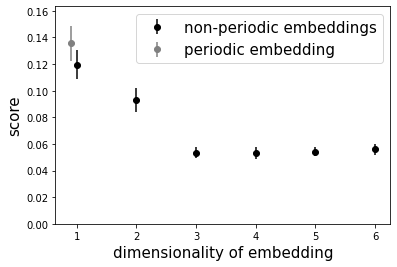

In [6]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
# plt.savefig("kp_scores.pdf")
plt.show()

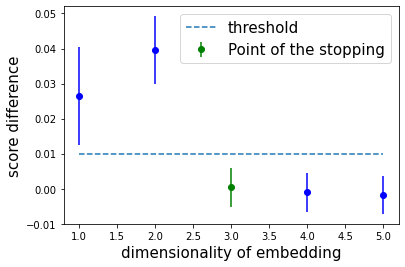

In [7]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
# plt.savefig("kp_diffs.pdf")
plt.show()

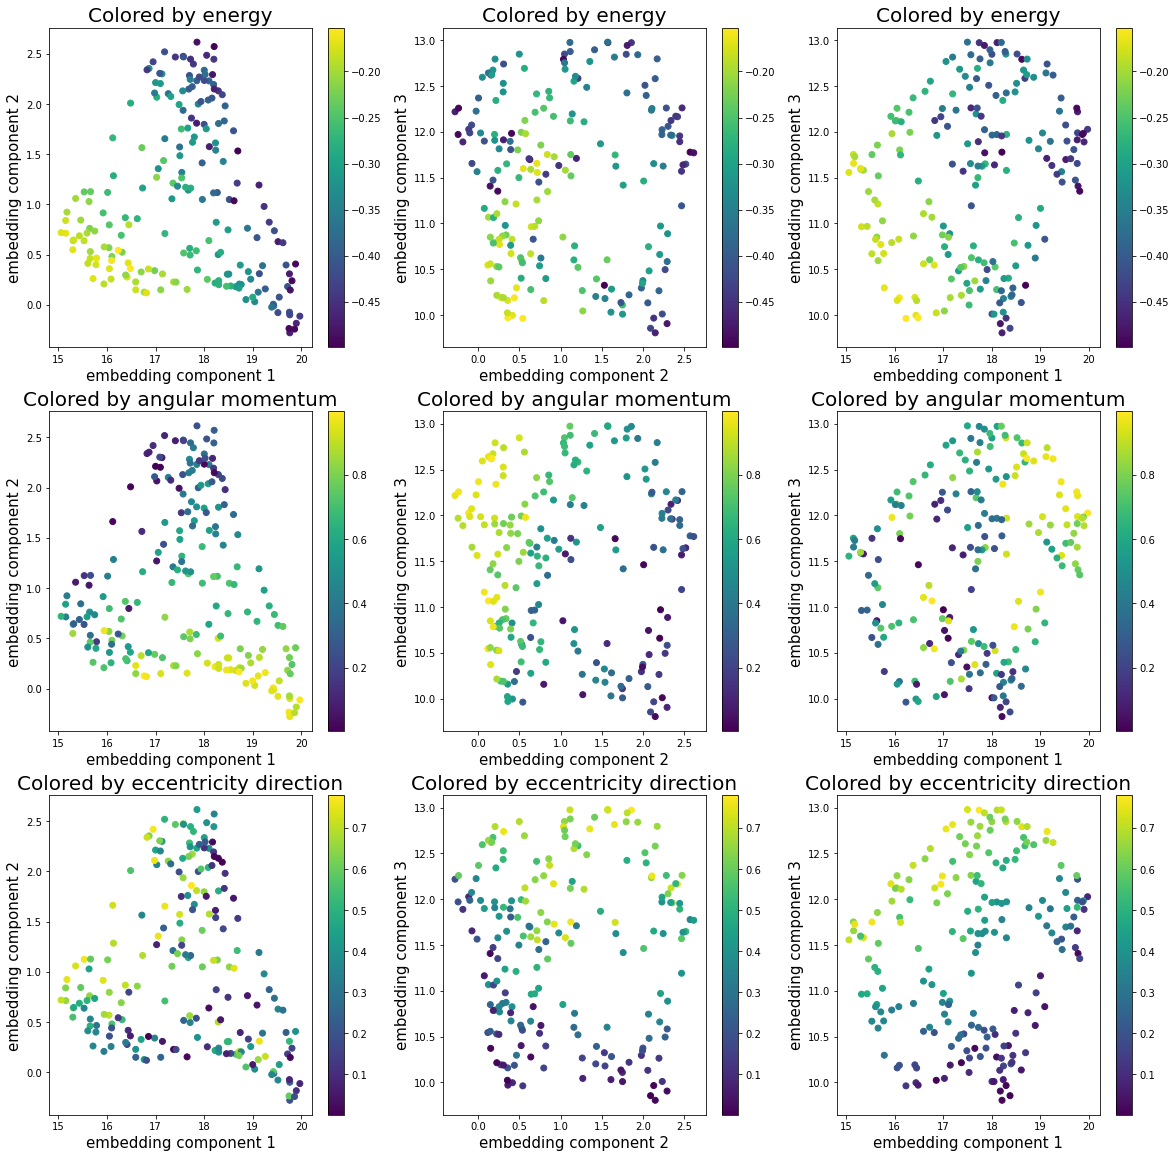

In [8]:
utils.plot_all_3d(*plt.subplots(3, 3, figsize=(20, 20)), embedding, params, ["energy", "angular momentum", "eccentricity direction"])
# plt.savefig("kp_energy.pdf")
plt.show()

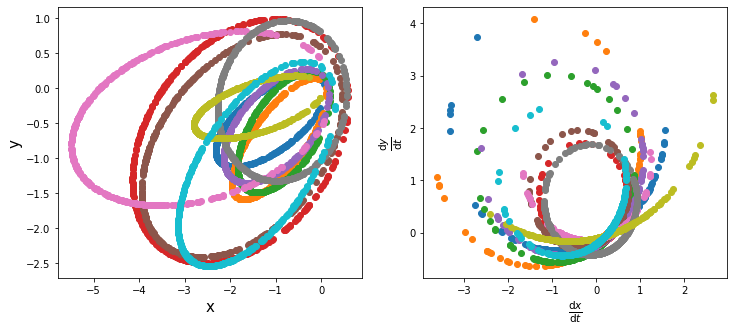

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for traj in data[:10]:
    axes[0].scatter(*traj.T[:2])
axes[0].set_xlabel("x", fontsize=15)
axes[0].set_ylabel("y", fontsize=15)

for traj in data[:10]:
    axes[1].scatter(*traj.T[2:])
axes[1].set_xlabel("$\\frac{\\mathrm{d}x}{\\mathrm{d}t}$", fontsize=15)
axes[1].set_ylabel("$\\frac{\\mathrm{d}y}{\\mathrm{d}t}$", fontsize=15)

# plt.savefig("kp_data.pdf")
plt.show()